In [1]:
# Setting up enivironment
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2
# %reload_ext autoreload

In [26]:
# Import external librarires
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
sys.path

['C:\\Users\\Adeliia\\Documents\\CVUT\\bp\\notebooks',
 'C:\\Users\\Adeliia\\Anaconda3\\python37.zip',
 'C:\\Users\\Adeliia\\Anaconda3\\DLLs',
 'C:\\Users\\Adeliia\\Anaconda3\\lib',
 'C:\\Users\\Adeliia\\Anaconda3',
 '',
 'C:\\Users\\Adeliia\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Adeliia\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Adeliia\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Adeliia\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Adeliia\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Adeliia\\.ipython',
 'C:\\Users\\Adeliia\\Documents\\CVUT\\bp\\notebooks\\..\\src']

# 1. Shoot and Go

In [3]:
from heur_sg import ShootAndGo

In [4]:
from objfun_node2vec import Node2VecFun
n2vfun = Node2VecFun('../data/email-Eu-core.txt',
                            '../data/email-Eu-core-department-labels.txt')

In [6]:
G = n2vfun.graph_const(n2vfun.edges)

In [7]:
len(G)

1005

In [8]:
n2vfun.edges

from   to
0         2    3
1         2    4
2         5    6
3         5    7
4         8    9
...     ...  ...
25565   420  143
25566   174  859
25567   440  460
25568    52  786
25569   506  932

[25570 rows x 2 columns]


## General experiment setup
Runs selected objective function (of) using selected heuristic multiple times, stores and returns data (results) in a data frame.



In [22]:
def experiment(of, num_runs, hmax):
    results = []
    for i in tqdm_notebook(range(num_runs), 'Testing hmax = {}'.format(hmax)):
        result = ShootAndGo(of, maxeval=5, hmax=hmax).search() # dict with results of one run
        result['run'] = i
        result['heur'] = 'SG_{}'.format(hmax) # name of the heuristic
        result['hmax'] = hmax
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'hmax', 'best_x', 'best_y', 'neval'])

In [10]:
table = pd.DataFrame()
# for hmax in [0, 1, 2, 5, 10, 20, 50, np.inf]:
for hmax in [0]:
    res = experiment(n2vfun, 10, hmax)
    table = pd.concat([table, res], axis=0)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


In [23]:
table2 = pd.DataFrame()
# for hmax in [0, 1, 2, 5, 10, 20, 50, np.inf]:
for hmax in [1]:
    res = experiment(n2vfun, 3, hmax)
    table2 = pd.concat([table, res], axis=0)


Computing transition probabilities: 100%|██████████| 1005/1005 [00:14<00:00, 71.52it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:42<00:00,  4.23s/it]

Computing transition probabilities:   0%|          | 0/1005 [00:00<?, ?it/s]C:\Users\Adeliia\Anaconda3\lib\site-packages\node2vec\node2vec.py:103: RuntimeWarning: divide by zero encountered in long_scalars
  ss_weight = self.graph[current_node][destination].get(self.weight_key, 1) * 1 / p
C:\Users\Adeliia\Anaconda3\lib\site-packages\node2vec\node2vec.py:116: RuntimeWarning: invalid value encountered in true_divide
  source] = unnormalized_weights / unnormalized_weights.sum()

Computing transition probabilities:  30%|███       | 305/1005 [00:08<00:15, 45.76it/s]


Computing transition probabilities: 100%|██████████| 1005/1005 [00:13<00:00, 72.07it/s]

Generating walks (CPU: 1):   0%|          | 0/10 [00:00<?, ?it/s]

ValueError: probabilities contain NaN

In [12]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
heur      10 non-null object
run       10 non-null int64
hmax      10 non-null int64
best_x    10 non-null float64
best_y    10 non-null float64
neval     10 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.0+ bytes


In [14]:
table

heur  run  hmax  best_x    best_y  neval
0  SG_0    0     0     1.2 -0.034826    inf
1  SG_0    1     0     1.7 -0.063682    inf
2  SG_0    2     0     0.7 -0.053731    inf
3  SG_0    3     0     0.8 -0.051741    inf
4  SG_0    4     0     0.3 -0.047761    inf
5  SG_0    5     0     1.2 -0.049751    inf
6  SG_0    6     0     0.7 -0.068657    inf
7  SG_0    7     0     1.3 -0.096517    inf
8  SG_0    8     0     0.5 -0.061692    inf
9  SG_0    9     0     1.0 -0.087562    inf

In [15]:
table.groupby(['hmax'])['best_y'].median()

hmax
0   -0.057711
Name: best_y, dtype: float64

In [16]:
table.groupby(['hmax'])['best_y'].mean()

hmax
0   -0.061592
Name: best_y, dtype: float64

<IPython.core.display.Javascript object>


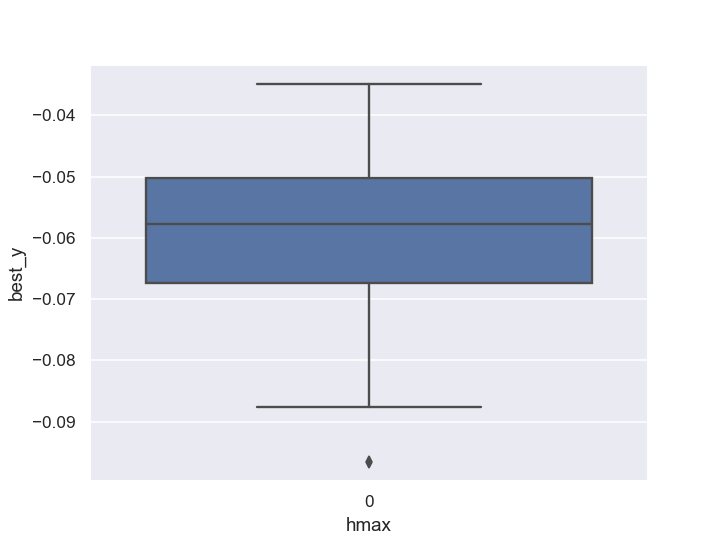

In [17]:
ax = sns.boxplot(x="hmax", y="best_y", data=table)

In [18]:
n2vfun.graph.edges()

EdgeView([(2, 3), (2, 4), (2, 192), (2, 281), (2, 195), (2, 305), (2, 2), (2, 412), (2, 102), (2, 194), (2, 55), (2, 252), (2, 13), (2, 63), (2, 586), (2, 408), (2, 138), (2, 434), (2, 6), (2, 58), (2, 114), (2, 193), (2, 174), (2, 285), (2, 5), (2, 137), (2, 323), (2, 211), (2, 238), (2, 520), (2, 635), (2, 481), (2, 665), (2, 59), (2, 208), (2, 506), (2, 516), (2, 517), (2, 160), (2, 286), (2, 57), (2, 132), (2, 162), (2, 409), (2, 411), (2, 587), (2, 140), (2, 96), (2, 64), (2, 809), (2, 826), (2, 158), (2, 738), (2, 832), (2, 273), (2, 803), (2, 845), (2, 571), (2, 89), (2, 54), (2, 599), (2, 300), (2, 489), (2, 612), (2, 564), (2, 249), (2, 865), (2, 166), (2, 283), (2, 107), (2, 494), (2, 62), (2, 880), (2, 698), (2, 899), (2, 86), (2, 886), (2, 546), (2, 812), (2, 164), (2, 859), (2, 308), (2, 131), (2, 56), (2, 126), (2, 333), (2, 971), (2, 271), (2, 990), (2, 685), (2, 651), (2, 896), (2, 405), (2, 1001), (5, 6), (5, 7), (5, 215), (5, 64), (5, 5), (5, 117), (5, 327), (5, 283),

In [24]:
for i in n2vfun.graph.neighbors(2):
    print(i)

3
4
192
281
195
305
2
412
102
194
55
252
13
63
586
408
138
434
6
58
114
193
174
285
5
137
323
211
238
520
635
481
665
59
208
506
516
517
160
286
57
132
162
409
411
587
140
96
64
809
826
158
738
832
273
803
845
571
89
54
599
300
489
612
564
249
865
166
283
107
494
62
880
698
899
86
886
546
812
164
859
308
131
56
126
333
971
271
990
685
651
896
405
1001


In [25]:
n2vfun.graph.nodes()

NodeView((2, 5, 8, 10, 12, 15, 17, 20, 23, 41, 43, 45, 47, 49, 52, 54, 60, 62, 64, 66, 68, 42, 70, 72, 71, 73, 75, 77, 80, 19, 82, 22, 21, 88, 90, 92, 89, 97, 103, 51, 108, 113, 115, 117, 76, 122, 14, 124, 13, 127, 131, 40, 18, 56, 134, 135, 137, 139, 141, 143, 144, 146, 83, 148, 150, 151, 152, 153, 154, 156, 158, 4, 133, 160, 84, 164, 165, 167, 123, 169, 24, 81, 173, 174, 176, 180, 181, 129, 184, 185, 106, 188, 191, 192, 208, 61, 209, 211, 212, 30, 155, 48, 214, 96, 216, 170, 98, 74, 229, 100, 230, 231, 233, 245, 246, 248, 175, 232, 254, 249, 222, 183, 259, 251, 262, 263, 264, 269, 271, 46, 275, 277, 101, 29, 279, 281, 282, 285, 258, 69, 280, 162, 293, 189, 295, 287, 298, 147, 301, 302, 303, 304, 252, 136, 268, 306, 236, 102, 6, 35, 320, 322, 220, 215, 321, 11, 328, 290, 333, 334, 336, 340, 58, 341, 353, 114, 288, 142, 356, 194, 63, 359, 86, 244, 335, 243, 44, 310, 363, 145, 39, 105, 37, 187, 116, 362, 178, 265, 195, 238, 190, 372, 55, 374, 376, 94, 404, 405, 157, 213, 286, 377, 408, 

# conclusion:

Compilations seems to be too complex. For that reason, I've decided to try my experiments on very small graph with 34 nodes separated into 2 groups only. 
G_karate = nx.karate_club_graph()

Further, bigger data may be used.